# Materi Praktikum: Strategi Greedy

### 1. Pengertian Strategi Greedy

- Strategi Greedy adalah salah satu metode pemecahan masalah dalam ilmu komputer. Prinsip utamanya adalah membuat pilihan yang tampak terbaik pada saat ini, dengan harapan bahwa serangkaian pilihan lokal yang optimal ini akan menghasilkan solusi global yang optimal.

- Pendekatan algoritma di mana kita membangun solusi langkah demi langkah. Pada setiap langkah, kita memilih opsi yang memberikan keuntungan terbesar saat itu juga, tanpa mempertimbangkan konsekuensi pilihan tersebut di masa depan.

### 2. Masalah Penukaran Koin (Coin Change Problem)

Contoh klasik di mana strategi Greedy seringkali berhasil (tergantung pada denominasi koin).


#### 2.1 Tahapan Implementasi

- (Definisikan Denominasi) Tentukan daftar koin yang tersedia, diurutkan dari yang terbesar ke yang terkecil.

- (Iterasi dan Kurangi) Lakukan iterasi melalui daftar denominasi. Untuk setiap koin, hitung berapa kali koin tersebut dapat digunakan untuk mengurangi jumlah yang harus ditukar tanpa melebihi jumlah sisa yang diperlukan.

- (Catat Hasil) Simpan jumlah koin yang digunakan untuk setiap denominasi.

#### 2.2 Kode Python

In [ ]:
def greedy_coin_change(denominasi, jumlah):
    """
    Menghitung jumlah koin minimum menggunakan strategi greedy.
    Denominasi harus diurutkan dari besar ke kecil.
    """
    # Pastikan denominasi sudah diurutkan (atau urutkan di sini)
    denominasi.sort(reverse=True)
    hasil = {}
    sisa_jumlah = jumlah
    print(f"Jumlah yang harus ditukar: {jumlah}")
    print(f"Denominasi yang tersedia (terbesar ke terkecil): {denominasi}")
    print("-" * 30)
    for koin in denominasi:
        if sisa_jumlah >= koin:
            # Hitung berapa kali koin ini bisa digunakan
            jumlah_koin = sisa_jumlah // koin
            # Catat hasil
            hasil[koin] = jumlah_koin
            # Kurangi jumlah sisa yang harus ditukar
            sisa_jumlah -= jumlah_koin * koin
            print(f"Menggunakan {jumlah_koin} koin senilai {koin}. Sisa: {sisa_jumlah}")
        if sisa_jumlah == 0:
            break
    print("-" * 30)
    
    if sisa_jumlah == 0:
        total_koin = sum(hasil.values())
        print(f"Solusi Ditemukan. Total Koin: {total_koin}")
        return hasil
    else:
        print(f"Gagal menemukan solusi optimal. Masih tersisa: {sisa_jumlah}")
        return None
denominasi_indo = [1000, 500, 200, 100, 50, 20, 10, 5, 1]
jumlah_tukar = 3870
hasil_penukaran = greedy_coin_change(denominasi_indo, jumlah_tukar)
# output: {1000: 3, 500: 1, 200: 1, 100: 1, 50: 1, 20: 1, 1: 0} (tergantung implementasi)

Jumlah yang harus ditukar: 3870
Denominasi yang tersedia (terbesar ke terkecil): [1000, 500, 200, 100, 50, 20, 10, 5, 1]
------------------------------
Menggunakan 3 koin senilai 1000. Sisa: 870
Menggunakan 1 koin senilai 500. Sisa: 370
Menggunakan 1 koin senilai 200. Sisa: 170
Menggunakan 1 koin senilai 100. Sisa: 70
Menggunakan 1 koin senilai 50. Sisa: 20
Menggunakan 1 koin senilai 20. Sisa: 0
------------------------------
Solusi Ditemukan. Total Koin: 8


### 3. Knapsack Problem

Strategi Greedy dapat digunakan untuk memecahkan Fractional Knapsack Problem (di mana barang dapat dipecah), tetapi tidak untuk 0/1 Knapsack (di mana barang harus diambil secara utuh).

#### 3.1 Tahapan Implementasi

1. Hitung Rasio: Hitung rasio nilai per berat (value/weight) untuk setiap item.
2. Urutkan: Urutkan item berdasarkan rasio ini dari yang terbesar ke yang terkecil.
3. Ambil Secara Greedy: Iterasi melalui item yang sudah diurutkan.Jika item dapat diambil secara utuh (berat item $\le$ kapasitas tersisa), ambil sepenuhnya.Jika item tidak dapat diambil secara utuh, ambil sebagian (pecahan) item tersebut untuk mengisi kapasitas tas yang tersisa.

#### 3.2 Implementasi Kode Python

In [19]:
def fractional_knapsack(kapasitas_max, item_list):
    """
    Memecahkan Fractional Knapsack Problem menggunakan strategi greedy.
    item_list = [(nilai, berat), ...]
    """
    
    # 1. Hitung Rasio dan buat daftar baru: [(rasio, nilai, berat), ...]
    # Rasio: item[0] / item[1]
    item_dengan_rasio = []
    for nilai, berat in item_list:
        rasio = nilai / berat
        item_dengan_rasio.append((rasio, nilai, berat))

    # 2. Urutkan berdasarkan rasio (dari terbesar ke terkecil)
    item_dengan_rasio.sort(key=lambda x: x[0], reverse=True)
    
    kapasitas_tersisa = kapasitas_max
    total_nilai = 0
    solusi = []

    print(f"Kapasitas Maksimal Tas: {kapasitas_max}")
    print("Urutan Item (Rasio Nilai/Berat):", item_dengan_rasio)
    print("-" * 30)
    
    # 3. Ambil Secara Greedy
    for rasio, nilai, berat in item_dengan_rasio:
        if kapasitas_tersisa == 0:
            break
            
        if berat <= kapasitas_tersisa:
            # Ambil item secara utuh
            total_nilai += nilai
            kapasitas_tersisa -= berat
            solusi.append((nilai, berat, 1.0)) # 1.0 berarti 100% diambil
            print(f"Mengambil item nilai {nilai}, berat {berat} (100%). Sisa Kapasitas: {kapasitas_tersisa}")
        else:
            # Ambil sebagian (pecahan)
            pecahan = kapasitas_tersisa / berat
            nilai_diambil = nilai * pecahan
            
            total_nilai += nilai_diambil
            solusi.append((nilai, berat, pecahan))
            kapasitas_tersisa = 0 # Kapasitas tas penuh
            print(f"Mengambil item nilai {nilai}, berat {berat} sebanyak {pecahan:.2f}. Sisa Kapasitas: {kapasitas_tersisa}")
            
    print("-" * 30)
    print(f"Total Nilai Maksimal: {total_nilai:.2f}")
    return solusi

# Contoh Penggunaan
# item_list = [(nilai, berat), ...]
items = [(60, 10), (100, 20), (60, 50), (120, 30)]
kapasitas = 50
hasil_knapsack = fractional_knapsack(kapasitas, items)

Kapasitas Maksimal Tas: 50
Urutan Item (Rasio Nilai/Berat): [(6.0, 60, 10), (5.0, 100, 20), (4.0, 120, 30), (1.2, 60, 50)]
------------------------------
Mengambil item nilai 60, berat 10 (100%). Sisa Kapasitas: 40
Mengambil item nilai 100, berat 20 (100%). Sisa Kapasitas: 20
Mengambil item nilai 120, berat 30 sebanyak 0.67. Sisa Kapasitas: 0
------------------------------
Total Nilai Maksimal: 240.00


### 4. Minimum Spanning Tree (MST)

MST adalah subgraph dari graf berbobot yang menghubungkan semua simpul tanpa siklus, dan memiliki total bobot tepi (edge) minimum.

#### 4.1 Algoritma Kruskal

Algoritma Kruskal menggunakan pendekatan Greedy dengan memilih tepi (edge) berbobot terkecil.

##### 4.1.1 Tahapan Implementasi

- Daftar Tepi: Buat daftar semua tepi pada graf.
- Urutkan Tepi: Urutkan daftar tepi berdasarkan bobotnya dari yang terkecil ke yang terbesar.
- Union-Find (Pengecekan Siklus): Gunakan struktur data Disjoint Set Union (DSU) atau Union-Find untuk melacak simpul mana yang sudah terhubung.
- Ambil Secara Greedy: Iterasi melalui tepi yang sudah diurutkan.
    - a. Untuk setiap tepi $(u, v)$, cek apakah $u$ dan $v$ sudah berada dalam himpunan terhubung yang sama.
    - b. Jika belum, maka tepi ini tidak akan membentuk siklus. Ambil tepi tersebut, tambahkan ke MST, dan gabungkan (Union) himpunan $u$ dan $v$.
    - c. Jika sudah, abaikan tepi ini.
- Stop: Berhenti ketika MST memiliki $|V|-1$ tepi, di mana $|V|$ adalah jumlah simpul.

##### 4.1.2 Implementasi Union-Find

In [20]:
# Union-Find Helper Class
class DisjointSet:
    def __init__(self, n):
        # parent[i] menyimpan parent dari node i
        self.parent = list(range(n))
        
    # Find operasi: menemukan root/representatif dari set
    def find(self, i):
        if self.parent[i] == i:
            return i
        # Path compression
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]
        
    # Union operasi: menggabungkan dua set
    def union(self, i, j):
        root_i = self.find(i)
        root_j = self.find(j)
        if root_i != root_j:
            # Gabungkan, misalnya root_i menjadi parent root_j
            self.parent[root_j] = root_i
            return True
        return False # Sudah dalam set yang sama

def kruskal_mst(jumlah_simpul, tepi_list):
    """
    Algoritma Kruskal untuk mencari Minimum Spanning Tree (MST).
    tepi_list = [(bobot, u, v), ...]
    """
    # 2. Urutkan Tepi berdasarkan bobot (dari terkecil)
    tepi_list.sort() 
    
    # 3. Inisialisasi Union-Find
    ds = DisjointSet(jumlah_simpul)
    mst_tepi = []
    total_bobot = 0
    
    print(f"Jumlah Simpul: {jumlah_simpul}")
    print("Tepi yang tersedia (terurut):", tepi_list)
    print("-" * 30)

    # 4. Ambil Secara Greedy
    for bobot, u, v in tepi_list:
        if len(mst_tepi) == jumlah_simpul - 1:
            break
            
        # Cek apakah u dan v sudah terhubung (membentuk siklus)
        if ds.find(u) != ds.find(v):
            # Jika belum, ambil tepi ini
            ds.union(u, v)
            mst_tepi.append((u, v, bobot))
            total_bobot += bobot
            print(f"Tepi dipilih: ({u}, {v}) dengan bobot {bobot}")
        else:
            print(f"Tepi diabaikan: ({u}, {v}) dengan bobot {bobot} (membentuk siklus)")

    print("-" * 30)
    print("MST Tepi:", mst_tepi)
    print("Total Bobot MST:", total_bobot)
    return mst_tepi

# Contoh Penggunaan (Simpul 0-5)
# tepi_list = [(bobot, u, v), ...]
graph_edges = [
    (7, 0, 1), (5, 0, 3), (8, 1, 2), (9, 1, 3), 
    (7, 1, 4), (5, 2, 4), (15, 3, 4), (6, 3, 5), 
    (8, 4, 5), (9, 4, 5) # Note: Edge (4,5) appears twice with different weight
]
kruskal_mst(6, graph_edges) # Simpul 0, 1, 2, 3, 4, 5

Jumlah Simpul: 6
Tepi yang tersedia (terurut): [(5, 0, 3), (5, 2, 4), (6, 3, 5), (7, 0, 1), (7, 1, 4), (8, 1, 2), (8, 4, 5), (9, 1, 3), (9, 4, 5), (15, 3, 4)]
------------------------------
Tepi dipilih: (0, 3) dengan bobot 5
Tepi dipilih: (2, 4) dengan bobot 5
Tepi dipilih: (3, 5) dengan bobot 6
Tepi dipilih: (0, 1) dengan bobot 7
Tepi dipilih: (1, 4) dengan bobot 7
------------------------------
MST Tepi: [(0, 3, 5), (2, 4, 5), (3, 5, 6), (0, 1, 7), (1, 4, 7)]
Total Bobot MST: 30


[(0, 3, 5), (2, 4, 5), (3, 5, 6), (0, 1, 7), (1, 4, 7)]

#### 4.2 Algoritma Prim

Algoritma Prim juga menggunakan pendekatan Greedy, tetapi berfokus pada simpul (vertex) dan memilih tepi dengan bobot terkecil yang menghubungkan simpul di MST saat ini dengan simpul di luar MST.

##### 4.2.1 Tahapan Implementasi

- Inisialisasi: Pilih simpul awal (biasanya simpul 0) untuk memulai MST. Tetapkan bobot 0 ke simpul awal dan $\infty$ ke semua simpul lainnya.
- Struktur Data: Gunakan Priority Queue (Heap) untuk menyimpan tepi yang mungkin, diurutkan berdasarkan bobotnya yang terkecil.
- Ambil Simpul Secara Greedy:
    - Selama Priority Queue tidak kosong:
        - Ambil simpul $u$ dengan bobot terkecil dari Priority Queue yang belum dimasukkan ke MST.
        - Tandai $u$ sudah masuk MST.
    - Perbarui Bobot: Untuk setiap tetangga $v$ dari $u$:
        - Jika $v$ belum di MST dan bobot tepi $(u, v)$ lebih kecil dari bobot $v$ saat ini, perbarui bobot $v$ dan masukkan/perbarui $v$ dalam Priority Queue.

##### 4.2.2 Implementasi Kode Menggunakan `heapq` untuk Priority Queue

In [21]:
import heapq

def prim_mst(graph, jumlah_simpul):
    """
    Algoritma Prim untuk mencari Minimum Spanning Tree (MST).
    graph = {u: [(v, bobot), ...], ...}
    """
    # Inisialisasi: key=bobot dari node ke MST, parent=node parent di MST
    # Simpul 0 dipilih sebagai simpul awal
    
    # Priority Queue: (bobot, u)
    pq = [(0, 0)] # Mulai dari simpul 0 dengan bobot 0
    
    # Struktur data untuk melacak MST
    key = [float('inf')] * jumlah_simpul
    parent = [-1] * jumlah_simpul
    in_mst = [False] * jumlah_simpul
    
    key[0] = 0
    mst_tepi = []
    total_bobot = 0
    
    print(f"Memulai Algoritma Prim dari simpul 0. Jumlah Simpul: {jumlah_simpul}")
    print("-" * 30)

    while pq:
        # 1. Ambil Simpul Secara Greedy
        # Ambil simpul u dengan bobot minimum yang belum di MST
        bobot_u, u = heapq.heappop(pq)
        
        if in_mst[u]:
            continue
            
        in_mst[u] = True
        total_bobot += bobot_u
        
        if parent[u] != -1:
             mst_tepi.append((parent[u], u, bobot_u))
             print(f"Simpul dipilih: {u} (dari {parent[u]}) dengan bobot {bobot_u}")
        else:
            print(f"Simpul awal dipilih: {u}")
        
        # 2. Perbarui Bobot
        for v, bobot_uv in graph.get(u, []):
            if not in_mst[v] and bobot_uv < key[v]:
                key[v] = bobot_uv
                parent[v] = u
                heapq.heappush(pq, (bobot_uv, v))
                
    print("-" * 30)
    print("MST Tepi (u, v, bobot):", mst_tepi)
    print("Total Bobot MST:", total_bobot)
    return mst_tepi

# Contoh Penggunaan (Simpul 0-5)
# graph = {u: [(v, bobot), ...], ...}
graph_adj = {
    0: [(1, 7), (3, 5)],
    1: [(0, 7), (2, 8), (3, 9), (4, 7)],
    2: [(1, 8), (4, 5)],
    3: [(0, 5), (1, 9), (4, 15), (5, 6)],
    4: [(1, 7), (2, 5), (3, 15), (5, 8)],
    5: [(3, 6), (4, 8)]
}
prim_mst(graph_adj, 6)

Memulai Algoritma Prim dari simpul 0. Jumlah Simpul: 6
------------------------------
Simpul awal dipilih: 0
Simpul dipilih: 3 (dari 0) dengan bobot 5
Simpul dipilih: 5 (dari 3) dengan bobot 6
Simpul dipilih: 1 (dari 0) dengan bobot 7
Simpul dipilih: 4 (dari 1) dengan bobot 7
Simpul dipilih: 2 (dari 4) dengan bobot 5
------------------------------
MST Tepi (u, v, bobot): [(0, 3, 5), (3, 5, 6), (0, 1, 7), (1, 4, 7), (4, 2, 5)]
Total Bobot MST: 30


[(0, 3, 5), (3, 5, 6), (0, 1, 7), (1, 4, 7), (4, 2, 5)]

### 5. Shortest Paths Problem: Algoritma Dijkstra

Algoritma Dijkstra memecahkan masalah jalur terpendek dari satu simpul sumber ke semua simpul lain dalam graf berbobot non-negatif (edge weights $\ge 0$). Ini adalah contoh dari strategi Greedy.
# <img src="image.jpg" alt="Algoritma Dijkstra" width="600"/>

![Contoh Gambar Algoritma Dijkstra](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)


#### 5.1 Tahapan Implementasi

- Tetapkan jarak dari simpul sumber ($s$) ke dirinya sendiri sebagai 0, dan ke semua simpul lain sebagai $\infty$.
- Gunakan Priority Queue (Heap) untuk menyimpan simpul yang akan diproses, diurutkan berdasarkan jaraknya yang terkecil dari simpul sumber $s$. Masukkan $(0, s)$ ke dalam PQ.
- Proses Simpul Secara Greedy:
    - Selama Priority Queue tidak kosong:
        - Ambil simpul $u$ dengan jarak minimum dari PQ.
        - Relaksasi Tepi: Untuk setiap tetangga $v$ dari $u$:
            - Hitung jarak baru dari sumber ke $v$ melalui $u$: $jarak(s \rightarrow u) + bobot(u, v)$.
            - Jika jarak baru ini lebih kecil dari jarak $v$ saat ini, perbarui jarak $v$ dan masukkan/perbarui $v$ dalam Priority Queue.

#### 5.2 Contih Kode Python

In [23]:
import heapq

def dijkstra(graph, sumber, jumlah_simpul):
    """
    Algoritma Dijkstra untuk mencari jalur terpendek dari simpul sumber.
    graph = {u: [(v, bobot), ...], ...}
    """
    # Inisialisasi
    jarak = {i: float('inf') for i in range(jumlah_simpul)}
    jarak[sumber] = 0
    
    # Priority Queue: (jarak, simpul)
    pq = [(0, sumber)]
    
    jalur = {i: None for i in range(jumlah_simpul)} # Untuk merekonstruksi jalur
    
    print(f"Jalur terpendek dari simpul sumber: {sumber}")
    print("-" * 30)

    while pq:
        # 1. Ambil Simpul Secara Greedy
        jarak_u, u = heapq.heappop(pq)
        
        # Jika jarak yang diambil dari PQ lebih besar dari jarak yang sudah tercatat, abaikan
        if jarak_u > jarak[u]:
            continue
            
        # 2. Relaksasi Tepi
        for v, bobot_uv in graph.get(u, []):
            jarak_baru = jarak_u + bobot_uv
            
            if jarak_baru < jarak[v]:
                # Perbarui jarak
                jarak[v] = jarak_baru
                jalur[v] = u # Catat simpul sebelumnya
                heapq.heappush(pq, (jarak_baru, v))
                print(f"Perbarui jarak ke {v}: {jarak_baru} (via {u})")

    print("-" * 30)
    print("Jarak Terpendek dari Sumber:")
    for simpul, dist in jarak.items():
        print(f"Simpul {simpul}: {dist}")
        
    return jarak

In [29]:
# Contoh Penggunaan (Simpul 0-5)
# graph = {u: [(v, bobot), ...], ...}
graph_dijkstra = {
    0: [(1, 4), (2, 1)],
    1: [(3, 1)],
    2: [(1, 2), (3, 5), (4, 10)],
    3: [(4, 2)],
    4: [(5, 3)],
    5: []
}
dijkstra(graph_dijkstra, 0, 6) # Simpul 0, 1, 2, 3, 4, 5

Jalur terpendek dari simpul sumber: 0
------------------------------
Perbarui jarak ke 1: 4 (via 0)
Perbarui jarak ke 2: 1 (via 0)
Perbarui jarak ke 1: 3 (via 2)
Perbarui jarak ke 3: 6 (via 2)
Perbarui jarak ke 4: 11 (via 2)
Perbarui jarak ke 3: 4 (via 1)
Perbarui jarak ke 4: 6 (via 3)
Perbarui jarak ke 5: 9 (via 4)
------------------------------
Jarak Terpendek dari Sumber:
Simpul 0: 0
Simpul 1: 3
Simpul 2: 1
Simpul 3: 4
Simpul 4: 6
Simpul 5: 9


{0: 0, 1: 3, 2: 1, 3: 4, 4: 6, 5: 9}

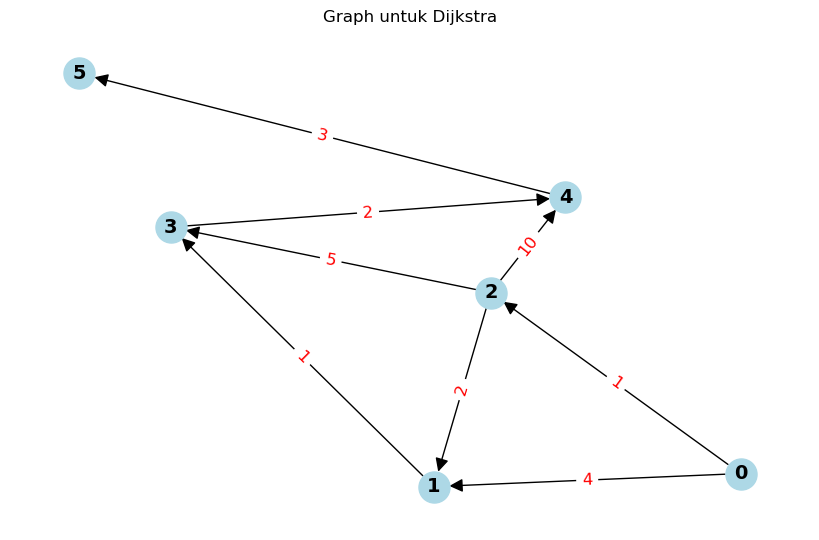

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graph untuk ilustrasi
G = nx.DiGraph()
for u in graph_dijkstra:
    for v, w in graph_dijkstra[u]:
        G.add_edge(u, v, weight=w)

# Posisi node supaya struktur rapi
pos = nx.spring_layout(G, seed=42)

# Gambar node dan edge
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=14, font_weight='bold', arrowsize=20)

# Label edge dengan bobot
edge_labels = {(u, v): w for u in graph_dijkstra for v, w in graph_dijkstra[u]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Graph untuk Dijkstra')
plt.axis('off')
plt.show()
